In [4]:
# !pip install --trusted-host pypi.python.org moviepy
# !pip install imageio-ffmpeg/

In [3]:
# !apt update && apt install -y ffmpeg
# !pip install -q mediapy

**Refrences and Resources**

    - https://google.github.io/mediapipe/solutions/holistic.html
    - https://github.com/AI4Bharat/OpenHands/blob/ea63a93ae2d194537bec7e24905c66d448021dab/scripts/mediapipe_extract.py
    - https://google.github.io/mediapipe/getting_started/cpp.html
    - https://colab.research.google.com/drive/16UOYQ9hPM6L5tkq7oQBl1ULJ8xuK5Lae?usp=sharing
    - https://github.com/google/mediapipe/issues/1757
    - https://github.com/google/mediapipe/issues/2274
    - https://stackoverflow.com/questions/69265059/is-it-possible-to-create-a-plotly-animated-3d-scatter-plot-of-mediapipes-body-p
    - https://github.com/google/mediapipe/blob/master/docs/solutions/hands.md
    - https://github.com/zengqunzhao/EfficientFace

In [59]:
# Basic
import os, sys, gc, io, time, re
from os.path import exists, join, basename, splitext
import numpy as np
from os.path import exists, join, basename, splitext
from glob import glob
from pathlib import Path
from tqdm.notebook import tqdm
from joblib import Parallel, delayed
from natsort import natsorted
import multiprocessing
import pandas as pd
import itertools
import pickle
import math

# OpenCV
import cv2

# Video Display
from IPython.display import HTML
from base64 import b64encode
import base64
from ipywidgets import Output, GridspecLayout
from IPython import display

# Video Manipulation
from moviepy.video.io.ffmpeg_tools import ffmpeg_extract_subclip
from moviepy.editor import *
import moviepy.editor as mpy
from moviepy.video.fx.all import crop
import mediapy as media
import matplotlib.pyplot as plt

# Media Pipe
import mediapipe as mp

# plotly 3D plot
import plotly.graph_objects as go
import plotly.express as px
import plotly

# 1.  Processing

#### List Directory Tree

In [2]:
data_root_path = "psl_data"
normalized_videos_save_path = "normalized_videos"
pose_data_save_path = "pose_extracted_dataset"

In [3]:
def list_files(startpath):
    for root, dirs, files in os.walk(startpath):
        level = root.replace(startpath, '').count(os.sep)
        indent = ' ' * 4 * (level)
        print('{}{}/'.format(indent, os.path.basename(root)))
        subindent = ' ' * 4 * (level + 1)
        for f in files:
            print('{}{}'.format(subindent, f))

In [6]:
list_files(data_root_path)

psl_data/
    Adjectives/
        abnormal_1623417023_80230.mp4
        actual_1623421112_43862.mp4
        affluent_1623421233_59082.mp4
        air_crash_1598515377_70180.mp4
    Adverbs/
        above_1609130856_65615.mp4
        absolutely_1609130886_21959.mp4
        almost_1609130930_19676.mp4
        already_1609130957_59241.mp4


In [7]:
sub_folders = []

for root,dirs,files in os.walk("psl_data"):
    sub_folders.append(dirs)

sub_folders = sum(sub_folders,[])
print(sub_folders)

['Adjectives', 'Adverbs']


#### All mp4 files

In [8]:
video_files = []

for folders in sub_folders:
    files = glob(f"{data_root_path}/{folders}/*.mp4")
    video_files.append(files)
    
print(video_files)

[['psl_data/Adjectives/abnormal_1623417023_80230.mp4', 'psl_data/Adjectives/actual_1623421112_43862.mp4', 'psl_data/Adjectives/affluent_1623421233_59082.mp4', 'psl_data/Adjectives/air_crash_1598515377_70180.mp4'], ['psl_data/Adverbs/above_1609130856_65615.mp4', 'psl_data/Adverbs/absolutely_1609130886_21959.mp4', 'psl_data/Adverbs/almost_1609130930_19676.mp4', 'psl_data/Adverbs/already_1609130957_59241.mp4']]


#### Meta Data Creation for processed and normalized videos fomr raw videos

In [9]:
Path(normalized_videos_save_path).mkdir(parents=True, exist_ok=True)

for sub_directory in  sub_folders:
    Path(f"{normalized_videos_save_path}/{sub_directory}").mkdir(parents=True, exist_ok=True)

#### Videos Cropping and trimming duration

In [10]:
# Each Directory Iterate
for sub_directory in tqdm(sub_folders):
    video_files = glob(f"{data_root_path}/{sub_directory}/*.mp4")
    
    print(" ================================= ")
    print(f"=       {sub_directory}          =")
    print(" ================================= ")
    
    # Each Video Iterate in Sub Directory
    for video_file in tqdm(video_files):
        
        vid_file = video_file.split("/")[-1]
        name = vid_file.split(".")[0]  
        
        # loading video dsa gfg intro video 
        clip = VideoFileClip(video_file)

        # Dimensions of video
        (w, h) = clip.size
        
        # Duration
        duration = clip.duration
        
        # Trimming Video for single Iteration
        trimmed_clip = clip.subclip(0, duration*0.5)
        
        # Duration
        duration = trimmed_clip.duration

        # Cropping
        border_thresh = 20
        one_third_width = int(w/3)*2 - border_thresh*2
        cropped_clip = crop(trimmed_clip,
                            x1 = border_thresh,
                            y1 = border_thresh,
                            x2 = one_third_width,
                            y2 = h)

        # saving
        cropped_clip.write_videofile(f"{normalized_videos_save_path}/{sub_directory}/{name}" + ".mp4")

  0%|          | 0/2 [00:00<?, ?it/s]

=       Adjectives          =


  0%|          | 0/4 [00:00<?, ?it/s]



chunk:   0%|             | 0/127 [00:00<?, ?it/s, now=None]

                                                           

t:   0%|                 | 0/143 [00:00<?, ?it/s, now=None]

Moviepy - Building video normalized_videos/Adjectives/abnormal_1623417023_80230.mp4.
MoviePy - Writing audio in abnormal_1623417023_80230TEMP_MPY_wvf_snd.mp3
MoviePy - Done.
Moviepy - Writing video normalized_videos/Adjectives/abnormal_1623417023_80230.mp4





t:   8%|▌      | 11/143 [00:00<00:01, 101.73it/s, now=None]

t:  15%|█      | 22/143 [00:00<00:01, 100.71it/s, now=None]

t:  23%|█▌     | 33/143 [00:00<00:01, 101.22it/s, now=None]

t:  31%|██▏    | 44/143 [00:00<00:00, 101.36it/s, now=None]

t:  38%|███     | 55/143 [00:00<00:00, 99.27it/s, now=None]

t:  45%|███▋    | 65/143 [00:00<00:00, 86.60it/s, now=None]

t:  52%|████▏   | 74/143 [00:00<00:00, 84.70it/s, now=None]

t:  58%|████▋   | 83/143 [00:00<00:00, 82.60it/s, now=None]

t:  64%|█████▏  | 92/143 [00:01<00:00, 80.97it/s, now=None]

t:  71%|████▉  | 101/143 [00:01<00:00, 80.44it/s, now=None]

t:  77%|█████▍ | 110/143 [00:01<00:00, 80.12it/s, now=None]

t:  83%|█████▊ | 119/143 [00:01<00:00, 79.87it/s, now=None]

t:  90%|██████▎| 128/143 [00:01<00:00, 81.24it/s, now=None]

t:  96%|██████▋| 137/143 [00:01<00:00, 80.35it/s, now=None]

                                                           

chunk:   0%|              | 0/80 [00:00<?, ?it/s, now=None]

                      

Moviepy - Done !
Moviepy - video ready normalized_videos/Adjectives/abnormal_1623417023_80230.mp4
Moviepy - Building video normalized_videos/Adjectives/actual_1623421112_43862.mp4.
MoviePy - Writing audio in actual_1623421112_43862TEMP_MPY_wvf_snd.mp3
MoviePy - Done.
Moviepy - Writing video normalized_videos/Adjectives/actual_1623421112_43862.mp4





t:  32%|██▌     | 28/87 [00:00<00:00, 276.84it/s, now=None]

t:  64%|█████▏  | 56/87 [00:00<00:00, 270.59it/s, now=None]

t:  97%|███████▋| 84/87 [00:00<00:00, 235.57it/s, now=None]

                                                           

chunk:   0%|              | 0/82 [00:00<?, ?it/s, now=None]

                                                           

t:   0%|                  | 0/93 [00:00<?, ?it/s, now=None]

Moviepy - Done !
Moviepy - video ready normalized_videos/Adjectives/actual_1623421112_43862.mp4
Moviepy - Building video normalized_videos/Adjectives/affluent_1623421233_59082.mp4.
MoviePy - Writing audio in affluent_1623421233_59082TEMP_MPY_wvf_snd.mp3
MoviePy - Done.
Moviepy - Writing video normalized_videos/Adjectives/affluent_1623421233_59082.mp4





t:  12%|▉       | 11/93 [00:00<00:00, 106.83it/s, now=None]

t:  24%|█▉      | 22/93 [00:00<00:00, 100.93it/s, now=None]

t:  35%|██▊     | 33/93 [00:00<00:00, 101.22it/s, now=None]

t:  47%|███▊    | 44/93 [00:00<00:00, 101.07it/s, now=None]

t:  59%|█████▎   | 55/93 [00:00<00:00, 99.60it/s, now=None]

t:  70%|██████▎  | 65/93 [00:00<00:00, 89.48it/s, now=None]

t:  81%|███████▎ | 75/93 [00:00<00:00, 82.50it/s, now=None]

t:  90%|████████▏| 84/93 [00:00<00:00, 82.79it/s, now=None]

t: 100%|█████████| 93/93 [00:01<00:00, 81.19it/s, now=None]

                                                           

chunk:   0%|             | 0/101 [00:00<?, ?it/s, now=None]

                                                           

t:   0%|                 | 0/115 [00:00<?, ?it/s, now=None]

Moviepy - Done !
Moviepy - video ready normalized_videos/Adjectives/affluent_1623421233_59082.mp4
Moviepy - Building video normalized_videos/Adjectives/air_crash_1598515377_70180.mp4.
MoviePy - Writing audio in air_crash_1598515377_70180TEMP_MPY_wvf_snd.mp3
MoviePy - Done.
Moviepy - Writing video normalized_videos/Adjectives/air_crash_1598515377_70180.mp4





t:  23%|█▋     | 27/115 [00:00<00:00, 267.91it/s, now=None]

t:  48%|███▎   | 55/115 [00:00<00:00, 271.58it/s, now=None]

t:  72%|█████  | 83/115 [00:00<00:00, 228.27it/s, now=None]

t:  93%|█████▌| 107/115 [00:00<00:00, 214.37it/s, now=None]

                                                           

Moviepy - Done !
Moviepy - video ready normalized_videos/Adjectives/air_crash_1598515377_70180.mp4
=       Adverbs          =


  0%|          | 0/4 [00:00<?, ?it/s]



chunk:   0%|              | 0/93 [00:00<?, ?it/s, now=None]

                                                           

t:   0%|                 | 0/105 [00:00<?, ?it/s, now=None]

Moviepy - Building video normalized_videos/Adverbs/above_1609130856_65615.mp4.
MoviePy - Writing audio in above_1609130856_65615TEMP_MPY_wvf_snd.mp3
MoviePy - Done.
Moviepy - Writing video normalized_videos/Adverbs/above_1609130856_65615.mp4





t:  27%|█▊     | 28/105 [00:00<00:00, 271.33it/s, now=None]

t:  53%|███▋   | 56/105 [00:00<00:00, 273.13it/s, now=None]

t:  80%|█████▌ | 84/105 [00:00<00:00, 222.82it/s, now=None]

                                                           

chunk:   0%|              | 0/95 [00:00<?, ?it/s, now=None]

                                                           

t:   0%|                 | 0/107 [00:00<?, ?it/s, now=None]

Moviepy - Done !
Moviepy - video ready normalized_videos/Adverbs/above_1609130856_65615.mp4
Moviepy - Building video normalized_videos/Adverbs/absolutely_1609130886_21959.mp4.
MoviePy - Writing audio in absolutely_1609130886_21959TEMP_MPY_wvf_snd.mp3
MoviePy - Done.
Moviepy - Writing video normalized_videos/Adverbs/absolutely_1609130886_21959.mp4





t:  25%|█▊     | 27/107 [00:00<00:00, 264.50it/s, now=None]

t:  51%|███▌   | 55/107 [00:00<00:00, 270.12it/s, now=None]

t:  78%|█████▍ | 83/107 [00:00<00:00, 227.85it/s, now=None]

t: 100%|██████| 107/107 [00:00<00:00, 218.35it/s, now=None]

                                                           

chunk:   0%|              | 0/98 [00:00<?, ?it/s, now=None]

                                                           

t:   0%|                 | 0/112 [00:00<?, ?it/s, now=None]

Moviepy - Done !
Moviepy - video ready normalized_videos/Adverbs/absolutely_1609130886_21959.mp4
Moviepy - Building video normalized_videos/Adverbs/almost_1609130930_19676.mp4.
MoviePy - Writing audio in almost_1609130930_19676TEMP_MPY_wvf_snd.mp3
MoviePy - Done.
Moviepy - Writing video normalized_videos/Adverbs/almost_1609130930_19676.mp4





t:  25%|█▊     | 28/112 [00:00<00:00, 276.69it/s, now=None]

t:  50%|███▌   | 56/112 [00:00<00:00, 277.66it/s, now=None]

t:  75%|█████▎ | 84/112 [00:00<00:00, 235.91it/s, now=None]

t:  97%|█████▊| 109/112 [00:00<00:00, 232.50it/s, now=None]

                                                           

chunk:   0%|              | 0/83 [00:00<?, ?it/s, now=None]

                                                           

t:   0%|                  | 0/94 [00:00<?, ?it/s, now=None]

Moviepy - Done !
Moviepy - video ready normalized_videos/Adverbs/almost_1609130930_19676.mp4
Moviepy - Building video normalized_videos/Adverbs/already_1609130957_59241.mp4.
MoviePy - Writing audio in already_1609130957_59241TEMP_MPY_wvf_snd.mp3
MoviePy - Done.
Moviepy - Writing video normalized_videos/Adverbs/already_1609130957_59241.mp4





t:  30%|██▍     | 28/94 [00:00<00:00, 276.26it/s, now=None]

t:  60%|████▊   | 56/94 [00:00<00:00, 274.22it/s, now=None]

t:  89%|███████▏| 84/94 [00:00<00:00, 226.69it/s, now=None]

                                                           

Moviepy - Done !
Moviepy - video ready normalized_videos/Adverbs/already_1609130957_59241.mp4


#### Processed Video Results

In [27]:
def show_local_mp4_video(file_name, width=640, height=480):

    video_encoded = base64.b64encode(io.open(file_name, 'rb').read())
    return HTML(data='''<video width="{0}" height="{1}" alt="test" controls>
                        <source src="data:video/mp4;base64,{2}" type="video/mp4" />
                      </video>'''.format(width, height, video_encoded.decode('ascii')))

In [12]:
show_local_mp4_video(f"{data_root_path}/{sub_directory}/{name}.mp4")

In [13]:
show_local_mp4_video(f"{normalized_videos_save_path}/{sub_directory}/{name}.mp4")

# 2. Pose Extraction

In [14]:
!nvidia-smi

Sat Aug 13 21:51:58 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 515.65.01    Driver Version: 515.65.01    CUDA Version: 11.7     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ...  Off  | 00000000:01:00.0  On |                  N/A |
| 51%   45C    P0    N/A /  75W |    367MiB /  2048MiB |      4%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [17]:
multiprocessing.cpu_count()

4

**hierarchical data structure**

In [4]:
# Generated Saving hierarchical data Directory
os.makedirs(pose_data_save_path, exist_ok=True)
for folder in glob(f"{normalized_videos_save_path}/*"):
    folder = folder.split("/")[1]
    os.makedirs(os.path.join(pose_data_save_path,folder), exist_ok=True)

In [5]:
file_paths = glob(f"{normalized_videos_save_path}/*/*")
save_paths = []

for file_path in file_paths:
    save_file_path_name = file_path.split("/")[1] + "/" + file_path.split("/")[2].replace(".mp4", "")
    save_file_path_name = pose_data_save_path + "/" + save_file_path_name
    save_paths.append(save_file_path_name)

In [6]:
# So our data file path and save paths would look something like this
print(file_paths[0])
print(save_paths[0])

normalized_videos/Adjectives/abnormal_1623417023_80230.mp4
pose_extracted_dataset/Adjectives/abnormal_1623417023_80230


**Video to Frames**

In [7]:
frames = []
vidcap = cv2.VideoCapture(file_paths[0])
while vidcap.isOpened():
    success, img = vidcap.read()
    if not success:
        break
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    # img = cv2.resize(img, (640, 480))
    frames.append(img)

vidcap.release() 

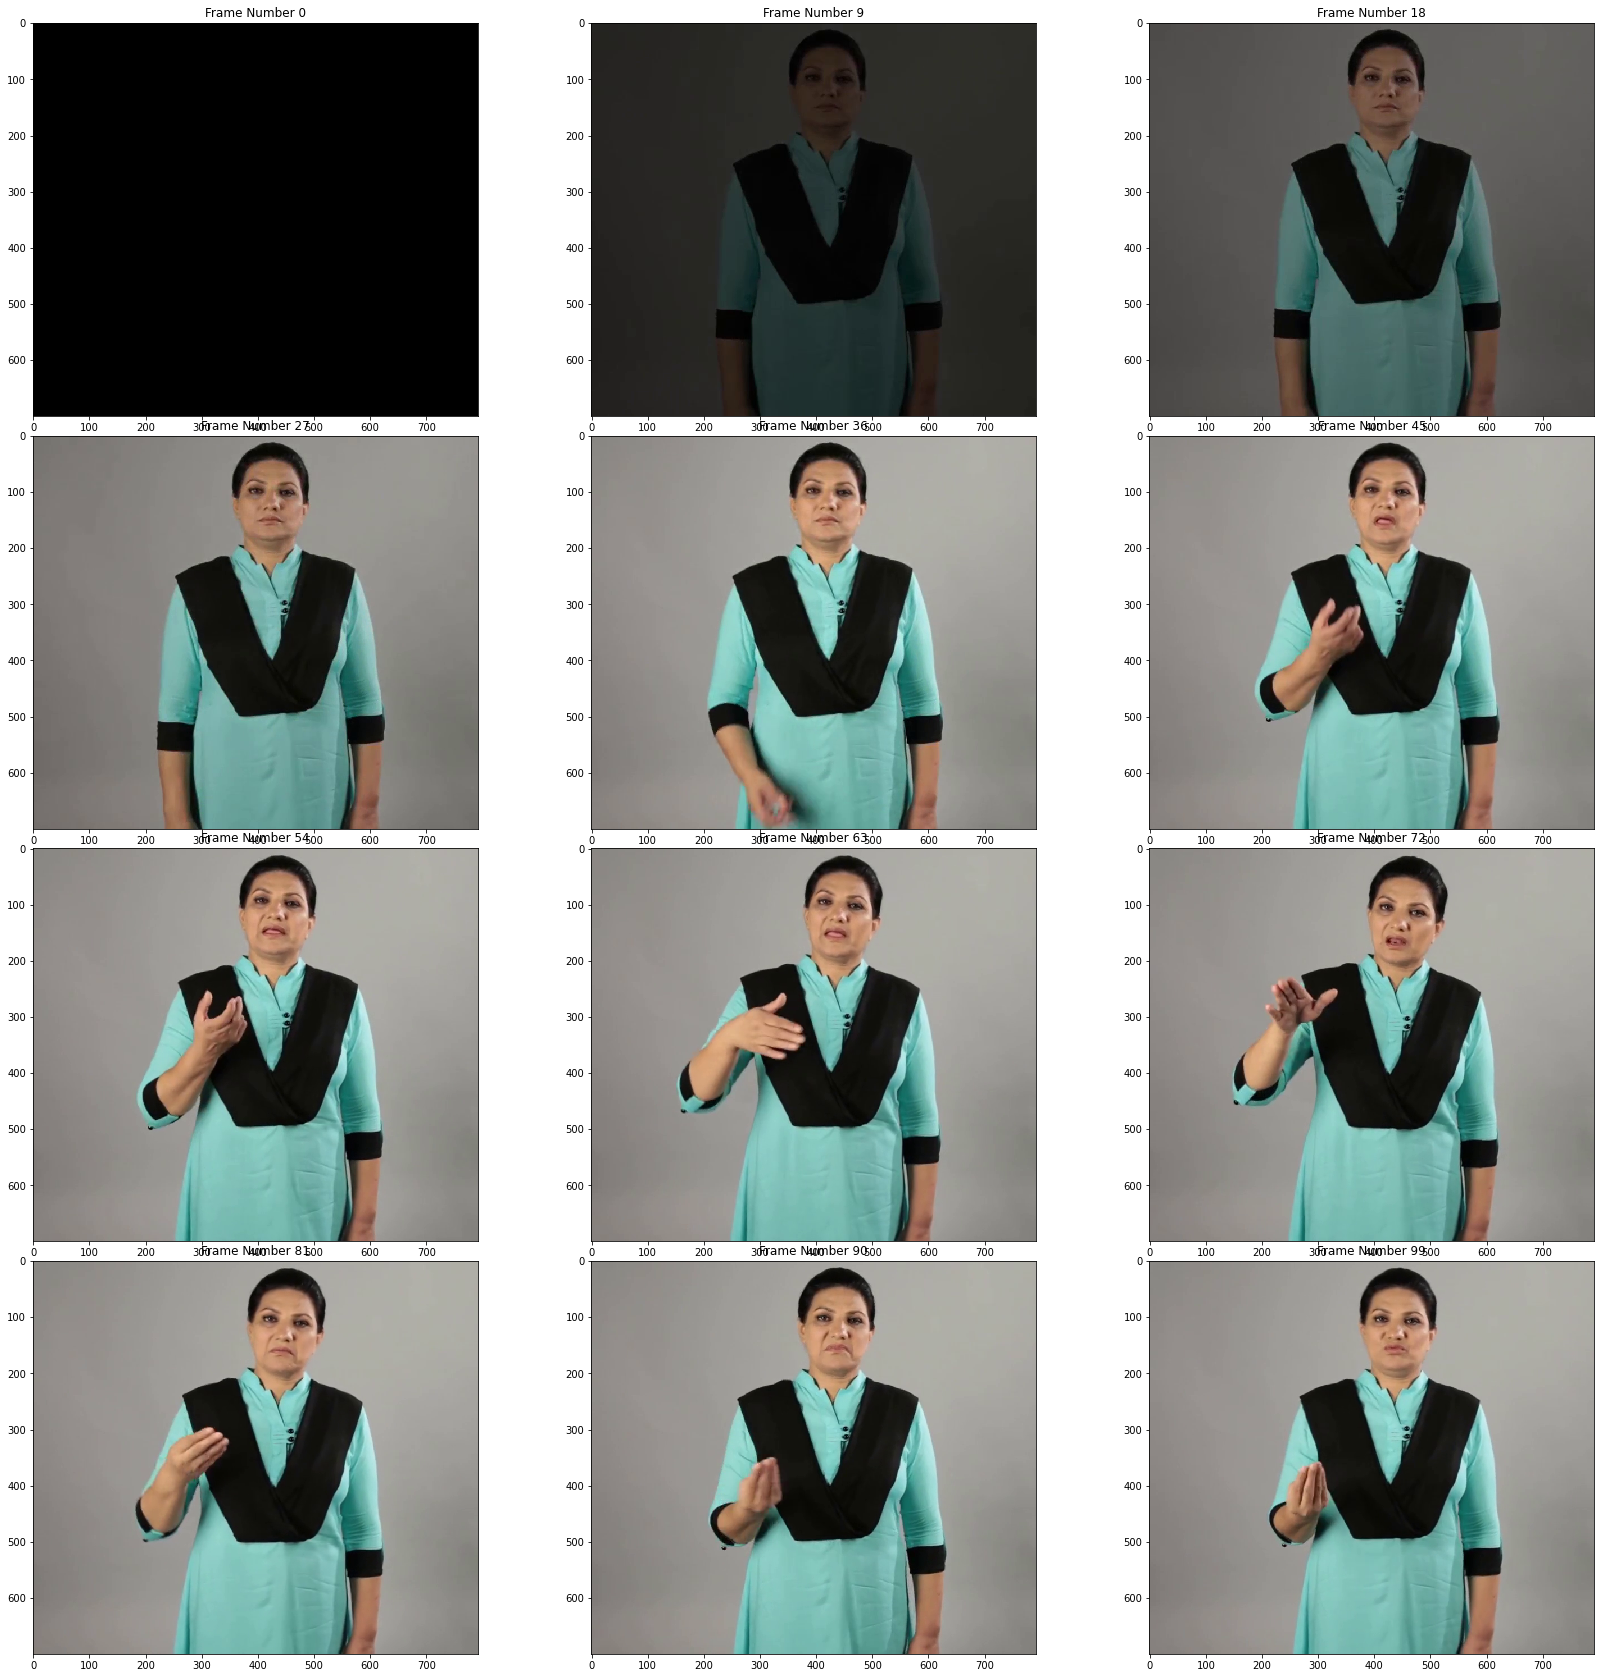

In [8]:
fig, axs = plt.subplots(4,3, figsize=(30, 30), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .05, wspace=.001)

axs = axs.ravel()

for i in range(12):
    
    # lets display some distant frames
    frame_count = i*9
    axs[i].imshow(frames[frame_count],interpolation='nearest')
    axs[i].set_title(f"Frame Number {frame_count}")

**Getting Holistic Key Points**

In [9]:
os.makedirs(os.path.join(pose_data_save_path,"frames"), exist_ok=True)
os.makedirs(os.path.join(pose_data_save_path,"frames/2d_frames"), exist_ok=True)
os.makedirs(os.path.join(pose_data_save_path,"frames/3d_frames"), exist_ok=True)

twoD_pose_path = os.path.join(pose_data_save_path,"frames/2d_frames/")
threeD_pose_path = os.path.join(pose_data_save_path,"frames/3d_frames/")

In [10]:
# For Video it is optimal to use static_image_mode=False
# Model Complexity to 1 as my kernal dies when i use 2
mp_holistic = mp.solutions.holistic
holistic=mp_holistic.Holistic(static_image_mode=False)

In [11]:
# Import drawing_utils and drawing_styles.
mp_pose = mp.solutions.pose
mp_drawing = mp.solutions.drawing_utils 
mp_drawing_styles = mp.solutions.drawing_styles

In [12]:
def pose_extracted_image(frame, frame_num):
    image_height, image_width, _ = frame.shape
    results = holistic.process(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
    if results.pose_landmarks:
          print(
              f'Nose coordinates: ('
              f'{results.pose_landmarks.landmark[mp_holistic.PoseLandmark.NOSE].x * image_width}, '
              f'{results.pose_landmarks.landmark[mp_holistic.PoseLandmark.NOSE].y * image_height})'
          )
    annotated_image = frame.copy()
    mp_drawing.draw_landmarks(annotated_image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
    mp_drawing.draw_landmarks(annotated_image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
    mp_drawing.draw_landmarks(
        annotated_image,
        results.face_landmarks,
        mp_holistic.FACEMESH_TESSELATION,
        landmark_drawing_spec=None,
        connection_drawing_spec=mp_drawing_styles
        .get_default_face_mesh_tesselation_style())
    mp_drawing.draw_landmarks(
        annotated_image,
        results.pose_landmarks,
        mp_holistic.POSE_CONNECTIONS,
        landmark_drawing_spec=mp_drawing_styles.
        get_default_pose_landmarks_style())

    cv2.imwrite(twoD_pose_path + str(frame_num) + '.png', cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB))
    return annotated_image

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


Nose coordinates: (425.9409155845642, 120.05198001861572)
Nose coordinates: (427.4496946334839, 121.14306390285492)
Nose coordinates: (428.64478397369385, 121.17071598768234)
Nose coordinates: (428.63590908050537, 121.40028774738312)
Nose coordinates: (428.6176872253418, 121.82191163301468)
Nose coordinates: (433.72410249710083, 121.6953232884407)
Nose coordinates: (440.85286045074463, 122.76646345853806)
Nose coordinates: (445.5798268318176, 131.99569880962372)
Nose coordinates: (450.47518014907837, 133.45462530851364)
Nose coordinates: (449.0417904853821, 132.92010873556137)
Nose coordinates: (448.17719650268555, 133.26278179883957)


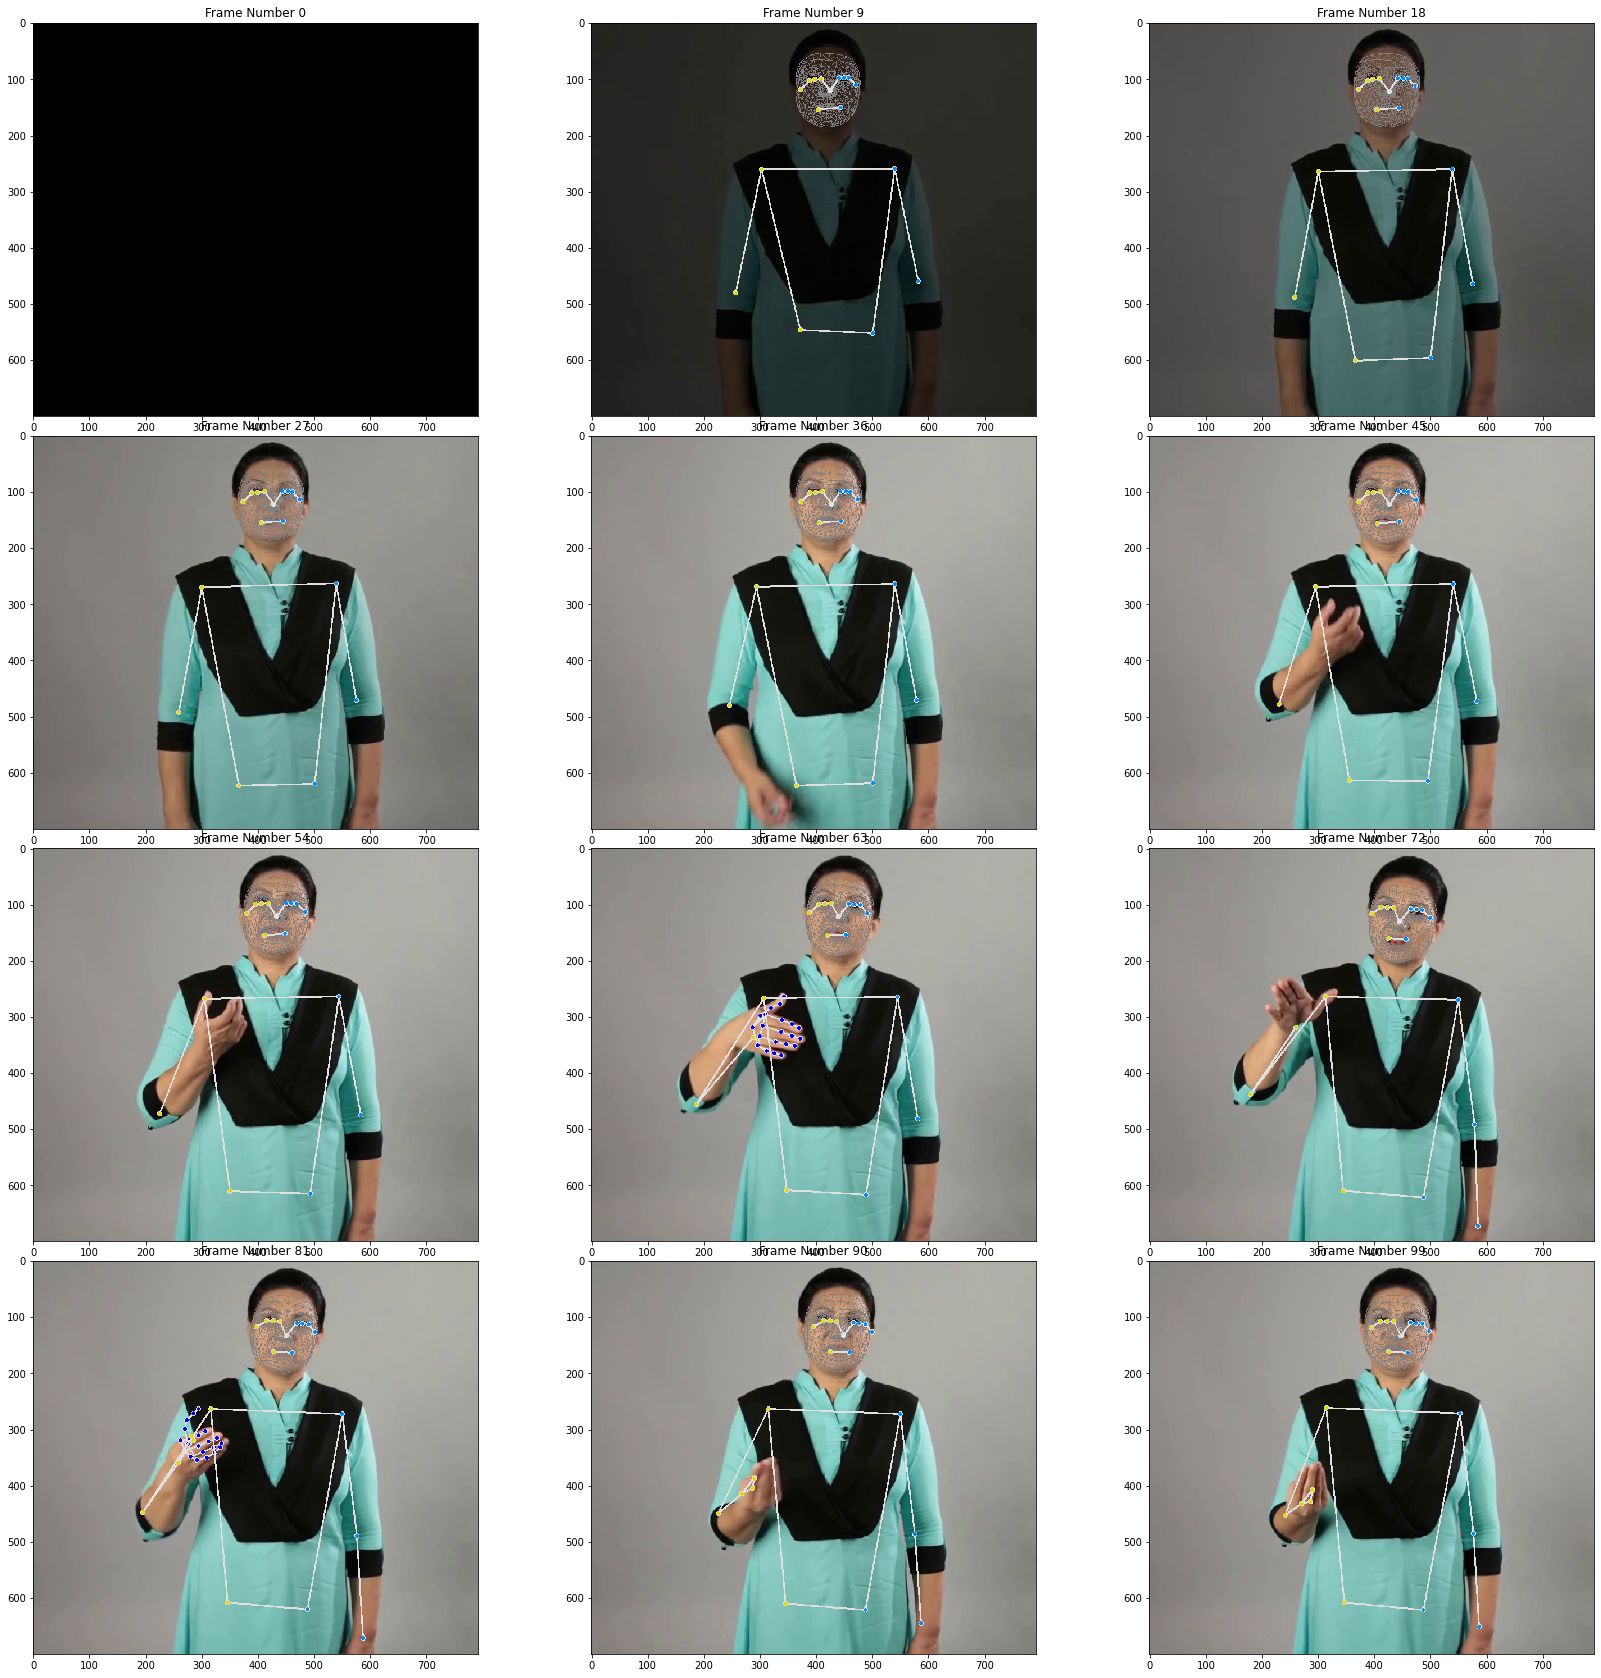

In [13]:
fig, axs = plt.subplots(4,3, figsize=(30, 30), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .05, wspace=.001)

axs = axs.ravel()

for i in range(12):
    
    # lets display some distant frames
    frame_count = i*9
    axs[i].imshow(pose_extracted_image(frames[frame_count], frame_count),interpolation='nearest')
    axs[i].set_title(f"Frame Number {frame_count}")

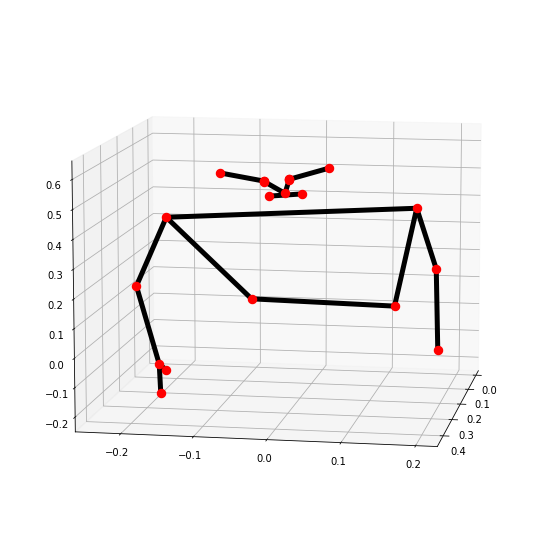

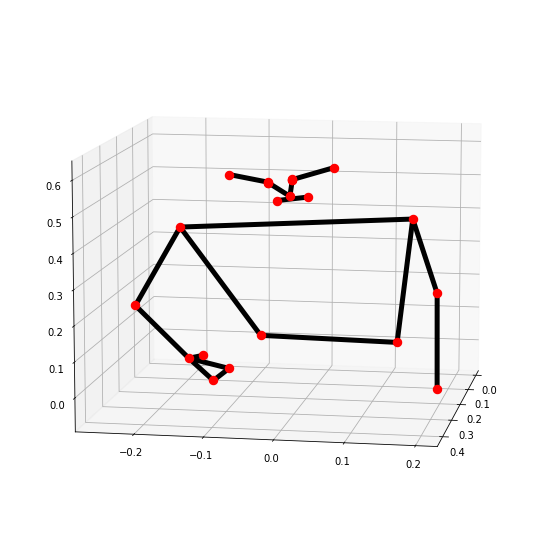

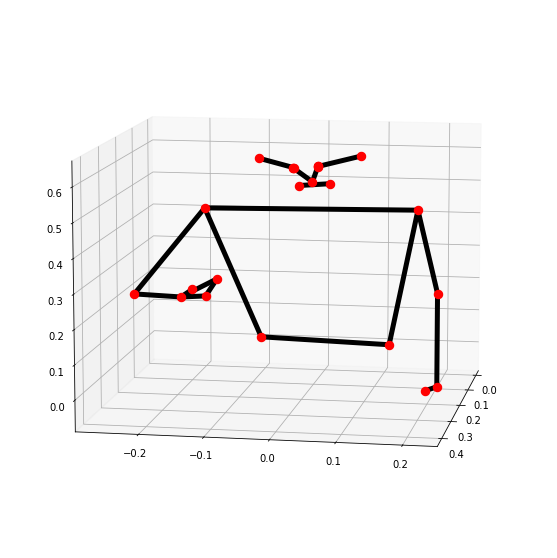

In [14]:
for i in range(4):
    
    # lets display some distant frames
    frame_count = i*20
    results = holistic.process(frames[frame_count])
    mp_drawing.plot_landmarks(results.pose_world_landmarks, mp_holistic.POSE_CONNECTIONS)

**Saving images to directory**

In [15]:
for i in tqdm(range(len(frames))):
    pose_extracted_image(frames[i], i)

  0%|          | 0/143 [00:00<?, ?it/s]

Nose coordinates: (426.30091524124146, 127.08939909934998)
Nose coordinates: (426.67333030700684, 126.52541548013687)
Nose coordinates: (426.6381139755249, 126.45766735076904)
Nose coordinates: (426.48030138015747, 126.48748904466629)
Nose coordinates: (426.6305136680603, 126.40045434236526)
Nose coordinates: (426.6986804008484, 125.79774111509323)
Nose coordinates: (426.847948551178, 125.48818588256836)
Nose coordinates: (427.3040142059326, 125.05202144384384)
Nose coordinates: (427.74067783355713, 124.7800275683403)
Nose coordinates: (428.3728723526001, 124.61413592100143)
Nose coordinates: (428.4883875846863, 124.55997914075851)
Nose coordinates: (428.34941053390503, 123.68503212928772)
Nose coordinates: (428.3753743171692, 123.04160743951797)
Nose coordinates: (428.4580807685852, 122.56338596343994)
Nose coordinates: (428.77346992492676, 122.7771446108818)
Nose coordinates: (428.7657279968262, 122.82659709453583)
Nose coordinates: (428.7843747138977, 123.22283238172531)
Nose coordi

**Plotly 3D Plot**

In [16]:
# https://stackoverflow.com/questions/69265059/is-it-possible-to-create-a-plotly-animated-3d-scatter-plot-of-mediapipes-body-p

_PRESENCE_THRESHOLD = 0.5
_VISIBILITY_THRESHOLD = 0.5


def plot_landmarks(
    landmark_list,
    connections=None,
):
    if not landmark_list:
        return
    plotted_landmarks = {}
    for idx, landmark in enumerate(landmark_list.landmark):
        if (
            landmark.HasField("visibility")
            and landmark.visibility < _VISIBILITY_THRESHOLD
        ) or (
            landmark.HasField("presence") and landmark.presence < _PRESENCE_THRESHOLD
        ):
            continue
        plotted_landmarks[idx] = (-landmark.z, landmark.x, -landmark.y)
    if connections:
        out_cn = []
        num_landmarks = len(landmark_list.landmark)
        # Draws the connections if the start and end landmarks are both visible.
        for connection in connections:
            start_idx = connection[0]
            end_idx = connection[1]
            if not (0 <= start_idx < num_landmarks and 0 <= end_idx < num_landmarks):
                raise ValueError(
                    f"Landmark index is out of range. Invalid connection "
                    f"from landmark #{start_idx} to landmark #{end_idx}."
                )
            if start_idx in plotted_landmarks and end_idx in plotted_landmarks:
                landmark_pair = [
                    plotted_landmarks[start_idx],
                    plotted_landmarks[end_idx],
                ]
                out_cn.append(
                    dict(
                        xs=[landmark_pair[0][0], landmark_pair[1][0]],
                        ys=[landmark_pair[0][1], landmark_pair[1][1]],
                        zs=[landmark_pair[0][2], landmark_pair[1][2]],
                    )
                )
        cn2 = {"xs": [], "ys": [], "zs": []}
        for pair in out_cn:
            for k in pair.keys():
                cn2[k].append(pair[k][0])
                cn2[k].append(pair[k][1])
                cn2[k].append(None)

    df = pd.DataFrame(plotted_landmarks).T.rename(columns={0: "z", 1: "x", 2: "y"})
    df["lm"] = df.index.map(lambda s: mp_pose.PoseLandmark(s).name).values
    fig = (
        px.scatter_3d(df, x="z", y="x", z="y", hover_name="lm")
        .update_traces(marker={"color": "red"})
        .update_layout(
            margin={"l": 0, "r": 0, "t": 0, "b": 0},
            scene={"camera": {"eye": {"x": 2.1, "y": 0, "z": 0}}},
        )
    )
    fig.add_traces(
        [
            go.Scatter3d(
                x=cn2["xs"],
                y=cn2["ys"],
                z=cn2["zs"],
                mode="lines",
                line={"color": "black", "width": 5},
                name="connections",
            )
        ]
    )

#     plotly.io.write_image(fig, file ="TEST", format="png")
    return fig

In [17]:
plot_landmarks(
        results.pose_world_landmarks,  mp_pose.POSE_CONNECTIONS)

**Image to Video**

In [62]:
all_processed_images = sorted(glob(f"{twoD_pose_path}/*"))
all_processed_images.sort(key=lambda f: int(re.sub('\D', '', f)))

clips = [ImageClip(m).set_duration(0.03) for m in all_processed_images]

concat_clip = concatenate_videoclips(clips[15:], method="compose")
concat_clip.write_videofile("test.mp4", fps=24)

t:   0%|                                      | 0/93 [00:00<?, ?it/s, now=None]

Moviepy - Building video test.mp4.
Moviepy - Writing video test.mp4



Moviepy - Done !
Moviepy - video ready test.mp4


In [63]:
show_local_mp4_video("test.mp4")